In [3]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for India Data Engineer Roles

In [20]:
df_DA_India = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Engineer')]

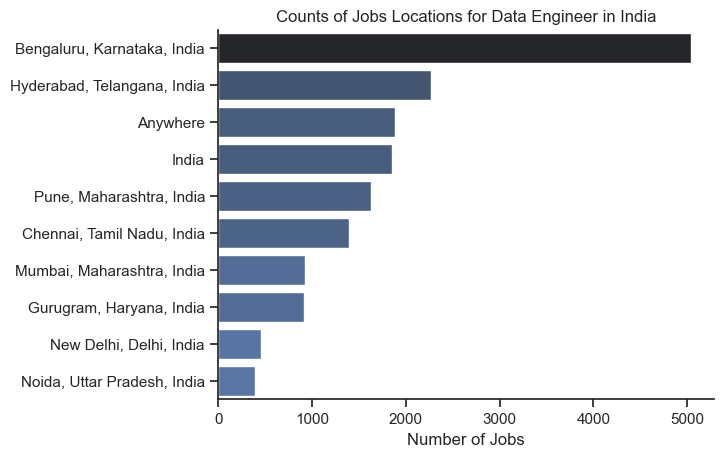

In [41]:
df_plot = df_DA_India['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title("Counts of Jobs Locations for Data Engineer in India")
plt.xlabel('Number of Jobs')
plt.ylabel("")
plt.show()

# Job Opportunities

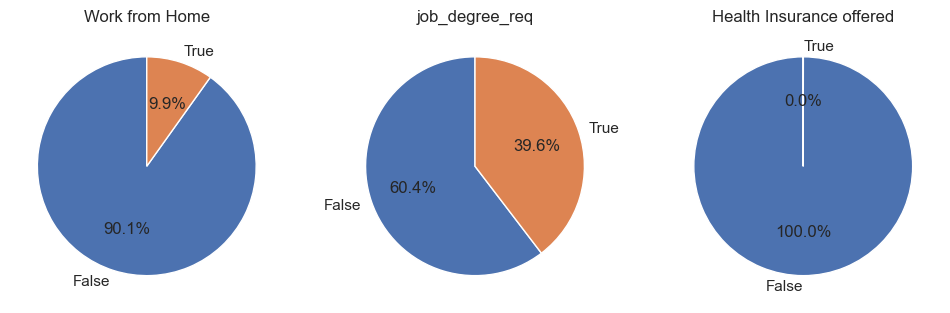

In [35]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

dict_columns = {
        'job_work_from_home':'Work from Home',
        'job_no_degree_mention': 'job_degree_req',
        'job_health_insurance': 'Health Insurance offered'

}
for i, (column,title) in enumerate(dict_columns.items()):
    ax[i].pie(df_DA_India[column].value_counts(),startangle=90, autopct='%1.1f%%', labels=['False','True'])
    ax[i].set_title(title)

plt.show()

# Companies to Explore

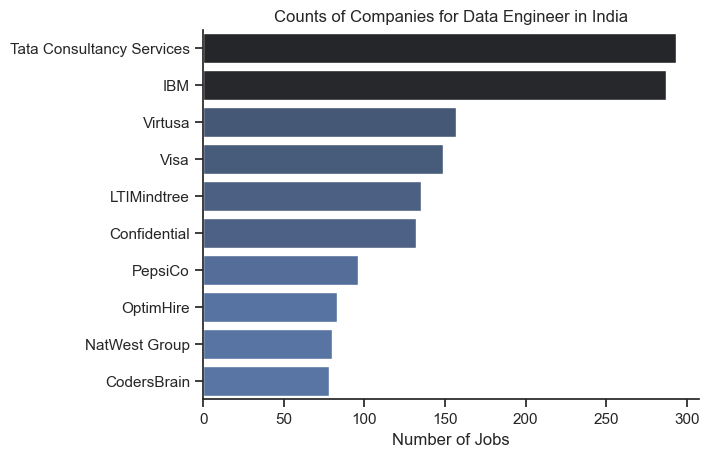

In [42]:
df_plot = df_DA_India['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title("Counts of Companies for Data Engineer in India")
plt.xlabel('Number of Jobs')
plt.ylabel("")
plt.show()